# Regressió polinòmica - Exemple Pressió by Temperatura
--------------------

En aquest exemple mirarem d'utilitzar una regressió polinòmica per explicar o obtenir el valor de la pressió a partir de la temperatura. 

In [53]:
# Importem les llibreries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 0. Anàlisi exploratori de dades

In [54]:
# Importar el data set
dades = pd.read_csv('dataset/data-temperatues-pressions.csv')
dades

,Temperatura,Pressio
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


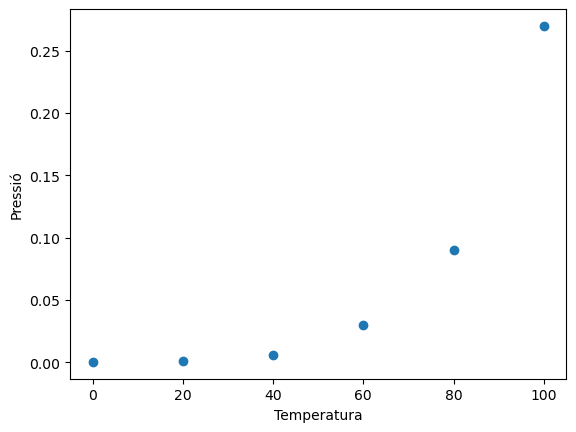

In [55]:
x = dades['Temperatura']
y = dades['Pressio']

plt.scatter(x, y)
plt.xlabel('Temperatura')
plt.ylabel('Pressió')
plt.show()

##  1. Regressió lineal simple

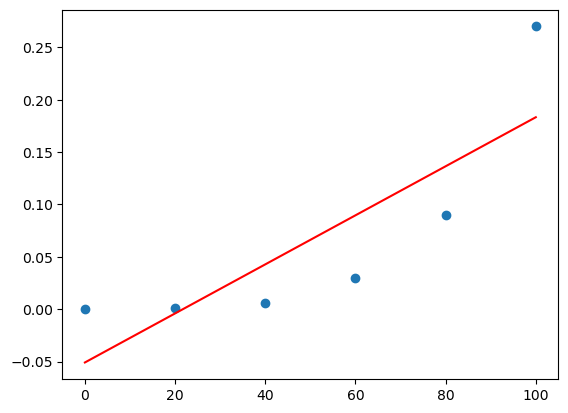

In [56]:
from sklearn.linear_model import LinearRegression

# Creem una regressió lineal simple
lr = LinearRegression()
#x_train = dades.iloc[:]['Temperatura'].values.reshape(-1,1)
#y_train = dades.iloc[:]['Pressio'].values.reshape(-1,1)
x_train = dades[['Temperatura']].values
y_train = dades[['Pressio']].values

lr.fit(x_train, y_train)


plt.scatter(x, y)
plt.plot(x, lr.predict(x_train), color = 'red')
plt.show()

## 2. Regressió polinòmica - grau 2

In [57]:
from sklearn.preprocessing import PolynomialFeatures

# Creem un polinòmi de grau 2 per la variable X
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html    
poly_model2 = PolynomialFeatures(degree = 2)

# Fem un fit i tranforma a la vegada
# Amb el fit bàsicament només declarem quina/quines característiques volem transformar
# Amb el transform fer la tranformació de les variables.
x_train_poly2 = poly_model2.fit_transform(x_train)
x_train_poly2
#### Matriu x_train_poly x^0, X, x^2
#1    0     0  
#1    2     4
#1    4    16
#1    6    36
#1    8    64
#1   10   100

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

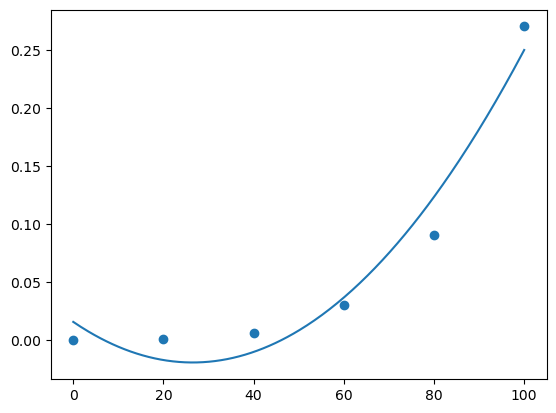

In [58]:
# Construim el model de regressió
poly_reg2 = LinearRegression()

poly_reg2.fit(x_train_poly2, y_train)

# Gràfic NO suavitzat
plt.scatter(x, y)
#plt.plot(x, poly_reg2.predict(x_train_poly2), color = 'red')
#plt.show()

# Gràfic suavitzat
#Intentem de suavitzar el gràfic mitjanánt splines
from scipy.interpolate import make_interp_spline, BSpline

col1= x_train.reshape(-1)
col_1_smooth = np.linspace(col1.min(), col1.max(), 300)
y_predict = poly_reg2.predict(x_train_poly2)
col2 = y_predict.reshape(-1)
col2_smooth = make_interp_spline(col1, col2)(col_1_smooth)
plt.plot(col_1_smooth, col2_smooth)


plt.show()


## 2. Regressió polinòmica - grau 3

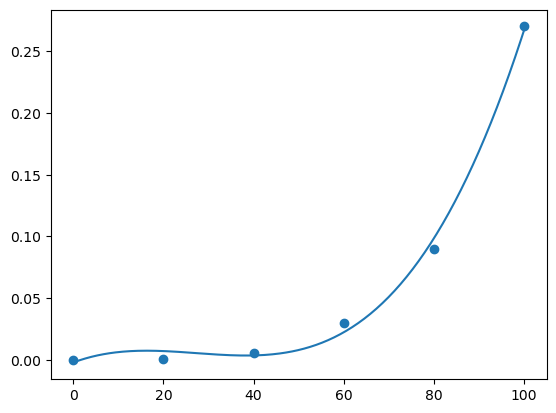

In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly_model3 = PolynomialFeatures(degree = 3)

# Fem un fit i tranforma a la vegada
# El fit entrena el model i el transform prepara les variables X amb tots els graus.
x_train_poly3 = poly_model3.fit_transform(x_train)

poly_reg3 = LinearRegression()

poly_reg3.fit(x_train_poly3, y_train)

# Gràfic NO suavitzat
plt.scatter(x, y)
#plt.plot(x, poly_reg3.predict(x_train_poly3), color = 'red')

# Gràfic suavitzat
#Intentem de suavitzar el gràfic mitjanánt splines
from scipy.interpolate import make_interp_spline, BSpline

col1= x_train.reshape(-1)
col_1_smooth = np.linspace(col1.min(), col1.max(), 300)
y_predict = poly_reg3.predict(x_train_poly3)
col2 = y_predict.reshape(-1)
col2_smooth = make_interp_spline(col1, col2)(col_1_smooth)
plt.plot(col_1_smooth, col2_smooth)


plt.show()

## 2. Regressió polinòmica - grau 4

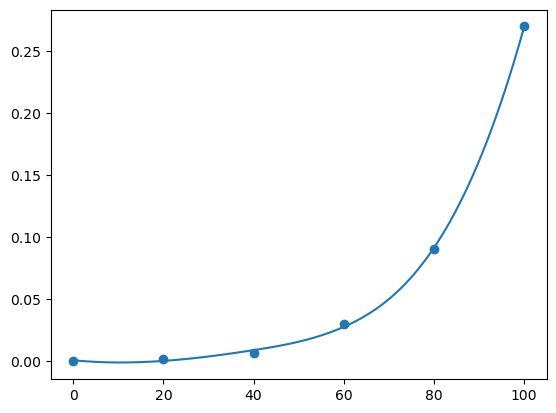

In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly_model4 = PolynomialFeatures(degree = 4)

# Fem un fit i tranforma a la vegada
# El fit entrena el model i el transform prepara les variables X amb tots els graus.
x_train_poly4 = poly_model4.fit_transform(x_train)

poly_reg4 = LinearRegression()

poly_reg4.fit(x_train_poly4, y_train)

plt.scatter(x, y)
#plt.plot(x, poly_reg4.predict(x_train_poly4), color = 'red')

# Gràfic suavitzat
#Intentem de suavitzar el gràfic mitjanánt splines
from scipy.interpolate import make_interp_spline, BSpline

col1= x_train.reshape(-1)
col_1_smooth = np.linspace(col1.min(), col1.max(), 300)
y_predict = poly_reg4.predict(x_train_poly4)
col2 = y_predict.reshape(-1)
col2_smooth = make_interp_spline(col1, col2)(col_1_smooth)
plt.plot(col_1_smooth, col2_smooth)


plt.show()

## 3. Evaluació dels model obtinguts

Fem un petit bucle fent tots els models de primer grau fins a 7è. Guardem els errors quadràtics mitjos (MSE) i els R2 en arrays per llavors mostar-los en gràfics

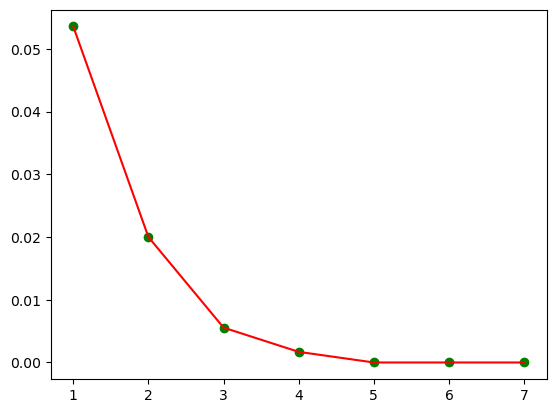

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Mirem per cada grau quin error tenim i r2
x_values = x_train
y_values = y_train
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
plt_r_squared = []

for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)
  
    poly_x_values = poly_model.fit_transform(x_values)
    #poly_model.fit(poly_x_values, y_values)
  
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)
  
    plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
    plt_r_squared.append(r2_score(y_train, y_pred))

plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 


[0.6903499726039811,
 0.9568461098911795,
 0.9966691251761722,
 0.9996910780718014,
 1.0,
 1.0,
 1.0]

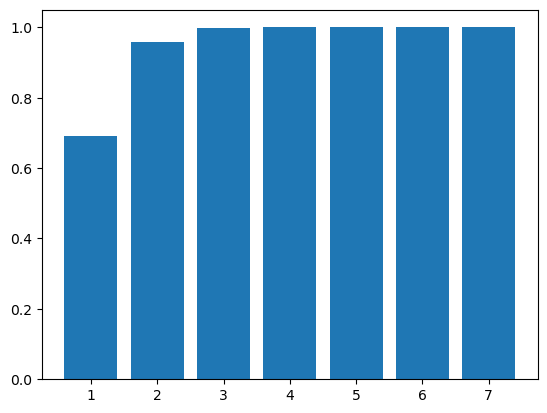

In [62]:
plt.bar(number_degrees,plt_r_squared)
plt_r_squared

Mirant el valor dels Error quadràtics mitjos (MSE) i R2 veiem que a partir de grau 2 ens podem trobar amb un overfitting Per tant el model bó en aquest cas seria o bé el de polinomi de grau 2 i si ens donen més dades podria acabar sent el de grau 3.